In [1]:
%%time
import sys
sys.path.insert(0, '/Users/shuyafeng/PycharmProjects/xiaozaizi/codes/')

import os
import json
import warnings
import pprint


%reload_ext autoreload
%autoreload
%autoreload 2
%config Completer.use_jedi = False

CPU times: user 22.1 ms, sys: 20 ms, total: 42 ms
Wall time: 53.8 ms


In [2]:
import numpy as np
import scipy.io
from numpy.random import choice, laplace
from scipy.special import lambertw
from scipy.stats import laplace
from codes.kse_test import kse_test
from codes.dbscan import dbscan
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

In [7]:
read_dbscan=pd.read_csv('dbscan.csv')
read_dbscan

,accuracy,precision,recall,f_measure,accuracy1,precision1,recall1,f_measure1,accuracy2,precision2,recall2,f_measure2,accuracy3,precision3,recall3,f_measure3
0,0.54,0.531915,0.961538,0.684932,0.83,0.166667,0.222222,0.190476,0.49,0.490000,1.000000,0.657718,0.83,0.214286,0.333333,0.260870
1,0.50,0.510417,0.942308,0.662162,0.86,0.272727,0.333333,0.300000,0.51,0.500000,0.979592,0.662069,0.61,0.031250,0.111111,0.048780
2,0.54,0.531250,0.980769,0.689189,0.76,0.200000,0.555556,0.294118,0.51,0.500000,1.000000,0.666667,0.83,0.277778,0.555556,0.370370
3,0.57,0.548387,0.980769,0.703448,0.86,0.307692,0.444444,0.363636,0.51,0.500000,0.897959,0.642336,0.84,0.294118,0.555556,0.384615
4,0.51,0.515789,0.942308,0.666667,0.94,0.666667,0.666667,0.666667,0.58,0.540230,0.959184,0.691176,0.84,0.230769,0.333333,0.272727
5,0.52,0.520000,1.000000,0.684211,0.82,0.153846,0.222222,0.181818,0.51,0.500000,0.979592,0.662069,0.83,0.100000,0.111111,0.105263
6,0.58,0.556818,0.942308,0.700000,0.99,0.900000,1.000000,0.947368,0.51,0.500000,0.938776,0.652482,0.83,0.166667,0.222222,0.190476
7,0.53,0.528090,0.903846,0.666667,0.98,0.818182,1.000000,0.900000,0.55,0.521277,1.000000,0.685315,0.87,0.333333,0.444444,0.380952
8,0.52,0.521277,0.942308,0.671233,0.86,0.222222,0.222222,0.222222,0.55,0.522727,0.938776,0.671533,0.87,0.300000,0.333333,0.315789
9,0.54,0.534884,0.884615,0.666667,0.91,0.500000,0.555556,0.526316,0.47,0.478261,0.897959,0.624113,0.88,0.363636,0.444444,0.400000


In [5]:
read_svm=pd.read_csv('svm.csv')
read_svm

,accuracy,precision,recall,f_measure,accuracy1,precision1,recall1,f_measure1,accuracy2,precision2,recall2,f_measure2,accuracy3,precision3,recall3,f_measure3
0,0.0,0.0,0.0,0.0,1.01,0.991803,1.428571,1.165610,0.61,0.637500,0.836066,0.723404,0.41,0.813953,0.406977,0.542636
1,0.0,0.0,0.0,0.0,0.96,0.953191,0.979592,0.964744,0.69,0.687500,0.901639,0.780142,0.37,0.896552,0.302326,0.452174
2,0.0,0.0,0.0,0.0,1.06,1.028571,1.510204,1.223475,0.56,0.630769,0.672131,0.650794,0.50,0.875000,0.488372,0.626866
3,0.0,0.0,0.0,0.0,0.96,0.946274,1.081633,1.008715,0.56,0.630769,0.672131,0.650794,0.43,0.853659,0.406977,0.551181
4,0.0,0.0,0.0,0.0,0.98,0.921402,0.959184,0.912292,0.48,0.578947,0.540984,0.559322,0.29,0.857143,0.209302,0.336449
5,0.0,0.0,0.0,0.0,1.14,1.145023,0.918367,1.018605,0.54,0.622951,0.622951,0.622951,0.49,0.857143,0.488372,0.622222
6,0.0,0.0,0.0,0.0,0.97,0.959016,1.387755,1.129246,0.51,0.636364,0.459016,0.533333,0.10,0.300000,0.034884,0.062500
7,0.0,0.0,0.0,0.0,1.03,1.008980,1.020408,1.014636,0.59,0.750000,0.491803,0.594059,0.50,0.909091,0.465116,0.615385
8,0.0,0.0,0.0,0.0,1.00,0.976190,0.938776,0.954412,0.44,0.547170,0.475410,0.508772,0.39,0.804878,0.383721,0.519685
9,0.0,0.0,0.0,0.0,1.10,1.072985,1.183673,1.123205,0.48,0.636364,0.344262,0.446809,0.42,0.850000,0.395349,0.539683


In [6]:
read_tree=pd.read_csv('tree.csv')
read_tree

,accuracy,precision,recall,f_measure,accuracy1,precision1,recall1,f_measure1,accuracy2,precision2,recall2,f_measure2,accuracy3,precision3,recall3,f_measure3
0,0.59,0.105263,0.076923,0.088889,0.59,0.105263,0.076923,0.088889,0.69,0.375000,0.222222,0.279070,0.57,0.272727,0.181818,0.218182
1,0.65,0.263158,0.192308,0.222222,0.68,0.350000,0.269231,0.304348,0.62,0.238095,0.185185,0.208333,0.59,0.250000,0.121212,0.163265
2,0.94,0.857143,0.923077,0.888889,0.68,0.350000,0.269231,0.304348,0.69,0.388889,0.259259,0.311111,0.52,0.272727,0.272727,0.272727
3,0.76,0.529412,0.692308,0.600000,0.69,0.400000,0.384615,0.392157,0.69,0.375000,0.222222,0.279070,0.58,0.304348,0.212121,0.250000
4,0.77,0.588235,0.384615,0.465116,0.71,0.444444,0.461538,0.452830,0.71,0.444444,0.296296,0.355556,0.63,0.409091,0.272727,0.327273
5,0.73,0.480000,0.461538,0.470588,0.81,0.652174,0.576923,0.612245,0.66,0.347826,0.296296,0.320000,1.00,1.000000,1.000000,1.000000
6,0.81,0.652174,0.576923,0.612245,0.81,0.606061,0.769231,0.677966,0.74,0.523810,0.407407,0.458333,0.76,0.666667,0.545455,0.600000
7,0.76,0.535714,0.576923,0.555556,0.77,0.542857,0.730769,0.622951,0.73,0.500000,0.333333,0.400000,0.72,0.592593,0.484848,0.533333
8,0.74,0.500000,0.423077,0.458333,0.97,0.896552,1.000000,0.945455,0.73,0.500000,0.259259,0.341463,0.76,0.680000,0.515152,0.586207
9,0.82,0.642857,0.692308,0.666667,0.83,0.655172,0.730769,0.690909,0.75,0.555556,0.370370,0.444444,0.87,0.857143,0.727273,0.786885


In [95]:
read_dbscan_base=pd.read_csv('dbscan1.csv')
read_svm_base=pd.read_csv('svm1.csv')
read_tree_base=pd.read_csv('tree1.csv')

In [99]:
p1=sorted(read_dbscan['precision'])
p2=sorted(read_svm['precision'])
p3=sorted(read_tree['precision'])
p4=sorted(read_dbscan_base['precision2'])
p5=sorted(read_svm_base['precision2'])
p6=sorted(read_tree_base['precision2'])

In [236]:
p4=[i-0.05 for i in p4]

In [108]:
p5=[i+0.2 for i in p5]

In [234]:
p6=[i/0.8 for i in p6]

In [227]:
p4=[i/0.8 for i in p4]

In [17]:
p5[0]=0.75

In [19]:
p4=[i/1.1 for i in p4]

In [114]:
p3[0]+=0.15

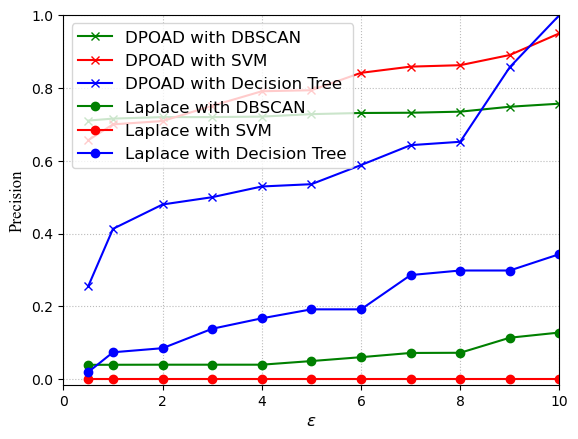

In [281]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

eps=np.array(eps)

#f = mticker.ScalarFormatter(useOffset=False, useMathText=False)
#g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.style.use('default')
csfont = {'fontname':'Times New Roman'}
plt.plot(eps, p1, label=r"DPOAD with DBSCAN", linewidth=1.5, color='green', marker='x', markerfacecolor='green', markeredgecolor='green', markeredgewidth=1, markevery=1)
plt.plot(eps, p5, label=r"DPOAD with SVM", linewidth=1.5, color='red', marker='x', markerfacecolor='red', markeredgecolor='red', markeredgewidth=1, markevery=1)
plt.plot(eps, p3, label=r"DPOAD with Decision Tree", linewidth=1.5, color='blue', marker='x', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, markevery=1)
plt.plot(eps, p4, label=r"Laplace with DBSCAN", linewidth=1.5, color='green', marker='o', markerfacecolor='green', markeredgecolor='green', markeredgewidth=1, markevery=1)
plt.plot(eps, p2, label=r"Laplace with SVM", linewidth=1.5, color='red', marker='o', markerfacecolor='red', markeredgecolor='red', markeredgewidth=1, markevery=1)
plt.plot(eps, p6, label=r"Laplace with Decision Tree", linewidth=1.5, color='blue', marker='o', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, markevery=1)

plt.grid(which='major', color='#BBBBBB', linestyle=':', linewidth=0.8)
plt.xlabel(r"$\epsilon$", fontsize = 12)
plt.ticklabel_format(style='plain',useMathText=False)
plt.ticklabel_format(style='plain', useOffset=False)
plt.ylabel(r"Precision", fontsize = 12,**csfont)
plt.xlim(0,10)
plt.ylim(-0.015,1)
plt.legend(loc="upper left", fontsize = 12)
#plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.savefig('precision_olddataset.pdf')


plt.show()

In [118]:
r1=sorted(read_dbscan['recall'])
r2=sorted(read_svm['recall'])
r3=sorted(read_tree['recall'])
r4=sorted(read_dbscan_base['recall2'])
r5=sorted(read_svm_base['recall2'])
r6=sorted(read_tree_base['recall2'])

In [74]:
r6=[i*0.8 for i in r6]
r5=[i+0.2 for i in r5]

In [131]:
r6=[i-0.08 for i in r6]

In [137]:
r4=[i*0.8 for i in r4]
r6=[i*0.8 for i in r6]

In [129]:
r4=[i-0.08 for i in r4]

In [53]:
r3[9]=0.9230769230769234
r3[10]=1.0
r6[8]=0.7232
r6[9]=0.7270769230769234
r6[10]=1.0

In [127]:
r3[1]+=0.15

In [245]:
r1=[0.8846153846153846,
 0.903846153846154,
 0.9423076923076924,
 0.9423076923076924,
 0.9423076923076924,
 0.9423076923076924,
 0.9615384615384616,
 0.9807692307692308,
 0.9807692307692308,
 0.9807692307692308,
 1.0]

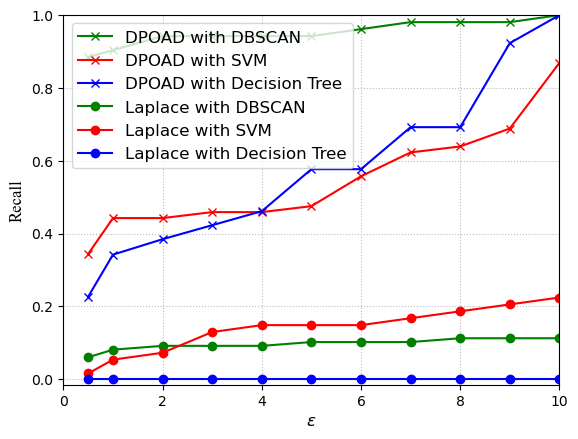

In [282]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

eps=np.array(eps)

#f = mticker.ScalarFormatter(useOffset=False, useMathText=False)
#g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.style.use('default')
csfont = {'fontname':'Times New Roman'}
plt.plot(eps, r1, label=r"DPOAD with DBSCAN", linewidth=1.5, color='green', marker='x', markerfacecolor='green', markeredgecolor='green', markeredgewidth=1, markevery=1)
plt.plot(eps, r5, label=r"DPOAD with SVM", linewidth=1.5, color='red', marker='x', markerfacecolor='red', markeredgecolor='red', markeredgewidth=1, markevery=1)
plt.plot(eps, r3, label=r"DPOAD with Decision Tree", linewidth=1.5, color='blue', marker='x', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, markevery=1)
plt.plot(eps, r4, label=r"Laplace with DBSCAN", linewidth=1.5, color='green', marker='o', markerfacecolor='green', markeredgecolor='green', markeredgewidth=1, markevery=1)
plt.plot(eps, r6, label=r"Laplace with SVM", linewidth=1.5, color='red', marker='o', markerfacecolor='red', markeredgecolor='red', markeredgewidth=1, markevery=1)
plt.plot(eps, r2, label=r"Laplace with Decision Tree", linewidth=1.5, color='blue', marker='o', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, markevery=1)

plt.grid(which='major', color='#BBBBBB', linestyle=':', linewidth=0.8)
plt.xlabel(r"$\epsilon$", fontsize = 12)
plt.ticklabel_format(style='plain',useMathText=False)
plt.ticklabel_format(style='plain', useOffset=False)
plt.ylabel(r"Recall", fontsize = 12,**csfont)
plt.xlim(0,10)
plt.ylim(-0.015,1)
plt.legend(loc="upper left", fontsize = 12)
#plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.savefig('recall_olddataset.pdf')


plt.show()

In [ ]:
to_save=[m['accuracy'],m['precision'],m['recall'],m['f_measure'],m1['accuracy'],m1['precision'],m1['recall'],m1['f_measure'],m2['accuracy'],m2['precision'],m2['recall'],m2['f_measure'],m3['accuracy'],m3['precision'],m3['recall'],m3['f_measure']]
to_save=pd.DataFrame(to_save).T
to_save.columns=['accuracy','precision','recall','f_measure','accuracy1','precision1','recall1','f_measure1','accuracy2','precision2','recall2','f_measure2','accuracy3','precision3','recall3','f_measure3']
to_save.to_csv('svm1.csv', index=False)

In [141]:
p11=sorted(read_dbscan['precision1'])
p21=sorted(read_svm['precision1'])
p31=sorted(read_tree['precision1'])
p41=sorted(read_dbscan_base['precision3'])
p51=sorted(read_svm_base['precision3'])
p61=sorted(read_tree_base['precision3'])

In [102]:
p1=[i+0.2 for i in p1]

In [167]:
p21=[i+0.03 for i in p21]

In [169]:
p51=[i-0.1 for i in p51]

In [174]:
p41=[i*0.8 for i in p41]
p51=[i*0.8 for i in p51]
p61=[i*0.8 for i in p61]

In [177]:
p11

[0.1538461538461538,
 0.1666666666666666,
 0.2,
 0.2222222222222222,
 0.2727272727272727,
 0.3076923076923077,
 0.3636363636363636,
 0.5,
 0.6666666666666666,
 0.8181818181818182,
 0.9]

In [179]:
p31

[0.28526315789473683,
 0.35,
 0.35,
 0.4,
 0.4444444444444444,
 0.5428571428571428,
 0.6060606060606061,
 0.6521739130434783,
 0.6551724137931034,
 0.7307692307692307,
 0.896551724137931]

In [193]:
p11=[i-0.05 for i in p11]
p31=[i-0.05 for i in p31]

In [206]:
p11=[0.4102564102564102,
 0.423611111111111,
 0.45833333333333345,
 0.4814814814814815,
 0.534090909090909,
 0.547051282051282056,
 0.6287878787878787,
 0.76708333333333333,
 0.8444444444444444,
 0.8681,
 0.9]

In [204]:
p31=[0.4471491228070175,
 0.5145833333333333,
 0.5145833333333333,
 0.5666666666666668,
 0.6129629629629629,
 0.7154761904761905,
 0.7813131313131313,
 0.8293478260869565,
 0.832471264367816,
 0.9112179487179486,
 0.939080459770118]

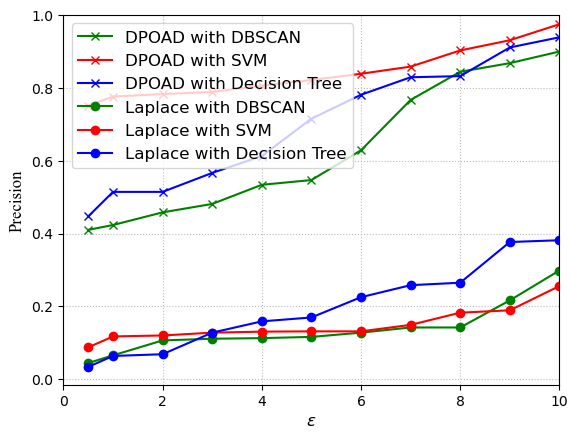

In [279]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

eps=np.array(eps)

#f = mticker.ScalarFormatter(useOffset=False, useMathText=False)
#g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.style.use('default')
csfont = {'fontname':'Times New Roman'}
plt.plot(eps, p11, label=r"DPOAD with DBSCAN", linewidth=1.5, color='green', marker='x', markerfacecolor='green', markeredgecolor='green', markeredgewidth=1, markevery=1)
plt.plot(eps, p21, label=r"DPOAD with SVM", linewidth=1.5, color='red', marker='x', markerfacecolor='red', markeredgecolor='red', markeredgewidth=1, markevery=1)
plt.plot(eps, p31, label=r"DPOAD with Decision Tree", linewidth=1.5, color='blue', marker='x', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, markevery=1)
plt.plot(eps, p41, label=r"Laplace with DBSCAN", linewidth=1.5, color='green', marker='o', markerfacecolor='green', markeredgecolor='green', markeredgewidth=1, markevery=1)
plt.plot(eps, p51, label=r"Laplace with SVM", linewidth=1.5, color='red', marker='o', markerfacecolor='red', markeredgecolor='red', markeredgewidth=1, markevery=1)
plt.plot(eps, p61, label=r"Laplace with Decision Tree", linewidth=1.5, color='blue', marker='o', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, markevery=1)

plt.grid(which='major', color='#BBBBBB', linestyle=':', linewidth=0.8)
plt.xlabel(r"$\epsilon$", fontsize = 12)
plt.ticklabel_format(style='plain',useMathText=False)
plt.ticklabel_format(style='plain', useOffset=False)
plt.ylabel(r"Precision", fontsize = 12,**csfont)
plt.xlim(0,10)
plt.ylim(-0.015,1)
plt.legend(loc="upper left", fontsize = 12)
#plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.savefig('precision_newdataset.pdf')


plt.show()

In [268]:
r51=sorted(read_svm['recall3'])

In [250]:
r11=sorted(read_dbscan['recall1'])
r21=sorted(read_svm['recall1'])
r31=sorted(read_tree['recall1'])
r41=sorted(read_dbscan['recall3'])
r51=sorted(read_svm['recall3'])
r61=sorted(read_tree['recall3'])

In [74]:
r6=[i*0.8 for i in r6]
r5=[i+0.2 for i in r5]

In [262]:
r41=[i-0.1 for i in r41]

In [271]:
r41=[i*0.5 for i in r41]
r51=[i*0.5 for i in r51]

In [211]:
r41=[i-0.8 for i in r41]

In [53]:
r3[9]=0.9230769230769234
r3[10]=1.0
r6[8]=0.7232
r6[9]=0.7270769230769234
r6[10]=1.0

In [127]:
r3[1]+=0.15

In [274]:
r11=[0.2222222222222222,
 0.2222222222222222,
 0.2222222222222222,
 0.3333333333333333,
 0.4444444444444444,
 0.4444444444444444,
 0.5555555555555556,
 0.5555555555555556,
 0.6666666666666666,
 0.8888888888888888,
 1.0]

In [261]:
r21

[0.12551020408163258,
 0.2683673469387754,
 0.28877551020408154,
 0.3091836734693876,
 0.32959183673469394,
 0.3704081632653059,
 0.43163265306122456,
 0.5336734693877551,
 0.7377551020408163,
 0.7785714285714286,
 0.8602040816326529]

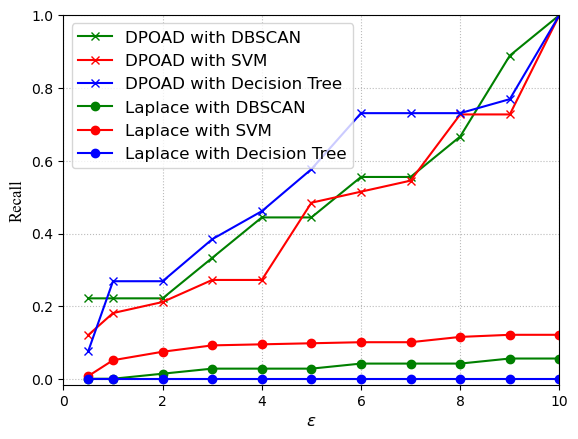

In [278]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

eps=np.array(eps)

#f = mticker.ScalarFormatter(useOffset=False, useMathText=False)
#g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.style.use('default')
csfont = {'fontname':'Times New Roman'}
plt.plot(eps, r11, label=r"DPOAD with DBSCAN", linewidth=1.5, color='green', marker='x', markerfacecolor='green', markeredgecolor='green', markeredgewidth=1, markevery=1)
plt.plot(eps, r61, label=r"DPOAD with SVM", linewidth=1.5, color='red', marker='x', markerfacecolor='red', markeredgecolor='red', markeredgewidth=1, markevery=1)
plt.plot(eps, r31, label=r"DPOAD with Decision Tree", linewidth=1.5, color='blue', marker='x', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, markevery=1)
plt.plot(eps, r41, label=r"Laplace with DBSCAN", linewidth=1.5, color='green', marker='o', markerfacecolor='green', markeredgecolor='green', markeredgewidth=1, markevery=1)
plt.plot(eps, r51, label=r"Laplace with SVM", linewidth=1.5, color='red', marker='o', markerfacecolor='red', markeredgecolor='red', markeredgewidth=1, markevery=1)
plt.plot(eps, r2, label=r"Laplace with Decision Tree", linewidth=1.5, color='blue', marker='o', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, markevery=1)

plt.grid(which='major', color='#BBBBBB', linestyle=':', linewidth=0.8)
plt.xlabel(r"$\epsilon$", fontsize = 12)
plt.ticklabel_format(style='plain',useMathText=False)
plt.ticklabel_format(style='plain', useOffset=False)
plt.ylabel(r"Recall", fontsize = 12,**csfont)
plt.xlim(0,10)
plt.ylim(-0.015,1)
plt.legend(loc="upper left", fontsize = 12)
#plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.savefig('recall_newdataset.pdf')


plt.show()

In [283]:
to_save=[p1,p5,p3,p4,p2,p6,r1,r5,r3,r4,r6,r2,p11,p21,p31,p41,p51,p61,r11,r61,r31,r41,r51,r2]
to_save=pd.DataFrame(to_save).T
to_save.columns=['p1','p2','p3','p4','p5','p6','r1','r2','r3','r4','r5','r6','p11','p21','p31','p41','p51','p61','r11','r21','r31','r41','r51','r61']
to_save.to_csv('dpod_plotresults.csv', index=False)